## Test individual sea level contributors

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd
import xarray as xr
from IPython.display import display
import sys
sys.path.append('../code')
import func_odyn as odyn
import func_misc as misc
import func_gic as gic
import func_gre as gre
import func_ant as ant
import func_B19 as b19

In [15]:
importlib.reload(odyn)
importlib.reload(misc)
importlib.reload(ant)


<module 'func_ant' from '../code/func_ant.py'>

In [16]:
SCE = 'rcp85'
ROOT = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'
DIR_T = ROOT+'Data_AR5/Tglobal/'
DIR_IPCC = ROOT+'Data_AR5/Final_Projections/'
N = int(1e5)
start_date = 1980    # Start reading data
ys = 2006   # Starting point for the integration, if this is changed problems in functions
ye = 2100   # End year for computation
nb_y = ye-start_date+1       # Period where data needs to be read
nb_y2 = ye - ys +1           # Period of integration of the model
TIME       = np.arange( start_date, ye + 1 )
TIME2      = np.arange( ys, ye + 1, 1 )
GAM = 1
GRE = 'IPCC'
NormD  = np.random.normal(0, 1, N)
Aoc = 3.6704e14              # Ocean Area (m2)
rho_w = 1e3                  # Water density (kg.m-3)
fac = -1e12 / (Aoc * rho_w)  # Convert Giga tones to m sea level
MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CNRM-CM5","CSIRO-Mk3-6-0","GFDL-ESM2G", \
    "GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES","inmcm4","IPSL-CM5A-LR", \
    "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM","MIROC-ESM","MPI-ESM-LR","MPI-ESM-MR", \
    "MRI-CGCM3","NorESM1-ME","NorESM1-M"]
 
#### Specific parameters
## Initial Antarctic dynamics contribution
a1_up_a           = 0.061    # Unit is cm/y, equal to observations in 2006
a1_lo_a           = 0.021
## Initial Greenland dynamics contribution
a1_up_g           = 0.076    # Unit is cm/y, equal to observations in 2006
a1_lo_g           = 0.043

In [17]:
def comp_plot_dist(X_ens, lo, hi, title_in, SCE):
    '''Easily compute the distribution, plot a histogram and table of percentile 
    values'''
    nbin = int(hi - lo) 
    X_pdf, bins = np.histogram(X_ens, bins=nbin, range=(lo, hi), density=True)
    bin_centers = (bins[1:] + bins[:-1])/2

    plt.bar(bin_centers, X_pdf, width=1)
    plt.ylabel('PDF')
    plt.title(title_in)
    plt.show()
    
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    perc = misc.perc_df(X_pdf, Perc, bin_centers)
    print("### Distribution ###")
    display(perc)

### Test ocean dynamics function: odyn.odyn_glob_ipcc

(3, 100000, 95)


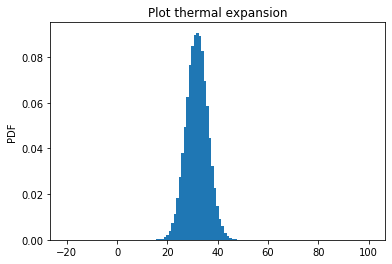

### Distribution ###


,values
percentiles,
1.0,21.0
5.0,24.0
10.0,26.0
17.0,27.0
20.0,28.0
50.0,31.0
80.0,35.0
83.0,35.0
90.0,37.0


In [24]:
X_O = odyn.odyn_glob_ipcc(SCE, DIR_IPCC, N, nb_y2, GAM, NormD)
print(X_O.shape)
comp_plot_dist(X_O[0,:,-1], -20.5, 100.5, 'Plot thermal expansion', SCE)


In [20]:
X_O[0,:,-1].cumsum(axis=0)*100
PDF_cum

array([3.17059293e+03, 6.81395980e+03, 9.81563246e+03, ...,
       3.17851957e+08, 3.17854675e+08, 3.17858326e+08])

### Test the temperature projection function

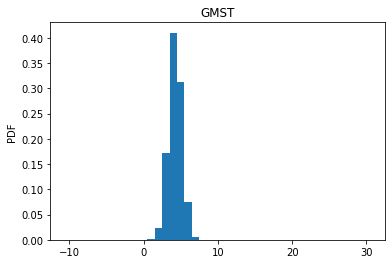

### Distribution ###


,values
percentiles,
1.0,1.0
5.0,2.0
10.0,2.0
17.0,3.0
20.0,3.0
50.0,4.0
80.0,5.0
83.0,5.0
90.0,5.0


In [18]:
files = misc.temp_path_AR5(MOD, DIR_T, SCE)
TGLOB = misc.tglob_cmip5(False, files, SCE, nb_y, start_date, ye)
i_ys   = np.where(TIME == ys)[0][0]
TGLOBs = TGLOB[:,i_ys:]
Tref_gic = misc.Tref(1986, 2005, TGLOB, TIME)
#Build the distribution of global temperature for this process
Td_gic = misc.TempDist(TGLOBs, Tref_gic, GAM, NormD)
comp_plot_dist(Td_gic[:,-1], -10.5, 30.5, 'GMST', SCE)

### Test the glacier projection function

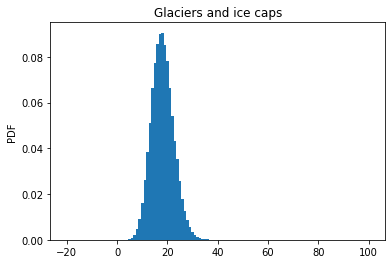

### Numbers for the total distribution ###
### Scenario rcp85 ###


,values
percentiles,
1.0,8.0
5.0,11.0
10.0,12.0
17.0,13.0
20.0,14.0
50.0,17.0
80.0,21.0
83.0,22.0
90.0,23.0


In [82]:
NormDs  = np.random.normal(0, 1, N)   # This distribution is then kept for correlation
X_gic = gic.gic_ar5(Td_gic, NormDs)

comp_plot_dist(X_gic[:,-1], -20.5, 100.5, 'Glaciers and ice caps', SCE)


### Test the Greenland SMB function

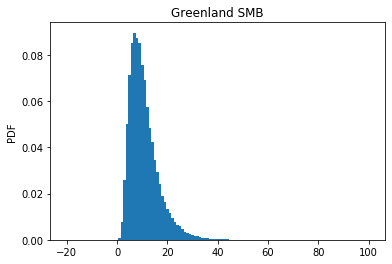

### Numbers for the total distribution ###
### Scenario rcp85 ###


,values
percentiles,
1.0,2.0
5.0,3.0
10.0,4.0
17.0,5.0
20.0,6.0
50.0,9.0
80.0,14.0
83.0,15.0
90.0,18.0


In [90]:
Tref_g   = misc.Tref(1980, 1999, TGLOB, TIME)   # Greenland SMB
Td_g  = misc.TempDist(TGLOBs, Tref_g, GAM, NormD)
NormDl = np.random.normal(0, 1, N)
X_gsmb = gre.fett13(fac, Td_g, NormDl, GRE)
comp_plot_dist(X_gsmb[:,-1], -20.5, 100.5, 'Greenland SMB', SCE)

### Test Antarctic SMB

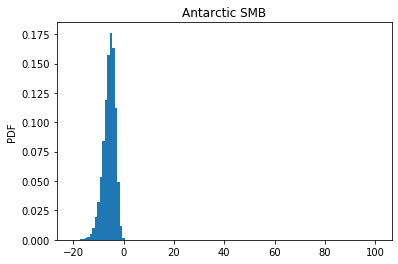

### Distribution ###


,values
percentiles,
1.0,-13.0
5.0,-11.0
10.0,-9.0
17.0,-8.0
20.0,-8.0
50.0,-6.0
80.0,-4.0
83.0,-4.0
90.0,-3.0


In [98]:
Tref_a = misc.Tref(1985, 2005, TGLOB, TIME)   # Antarctic SMB
Td_a = misc.TempDist(TGLOBs, Tref_a, GAM, NormD)
NormDl = np.random.normal(0, 1, N)
X_asmb = ant.ant_smb_ar5(NormDl, fac, Td_a)
comp_plot_dist(X_asmb[:,-1], -20.5, 100.5, 'Antarctic SMB', SCE)

### Test land water storage

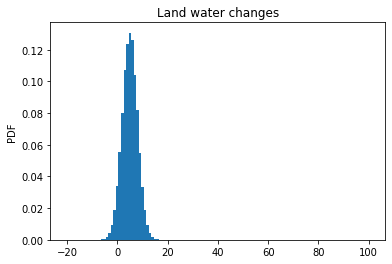

### Distribution ###


,values
percentiles,
1.0,-3.0
5.0,-1.0
10.0,1.0
17.0,2.0
20.0,2.0
50.0,5.0
80.0,7.0
83.0,7.0
90.0,8.0


In [101]:
X_landw = misc.landw_ar5(ys, TIME2, N)
comp_plot_dist(X_landw[:,-1], -20.5, 100.5, 'Land water changes', SCE)

### Test Antarctic dynamics

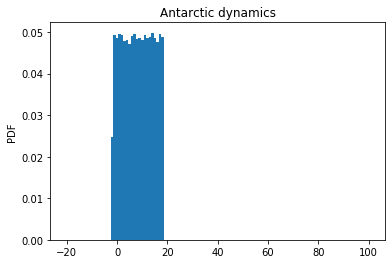

### Distribution ###


,values
percentiles,
1.0,-20.0
5.0,-1.0
10.0,0.0
17.0,1.0
20.0,2.0
50.0,8.0
80.0,14.0
83.0,15.0
90.0,16.0


In [104]:
Unif_AA   = np.random.uniform(0, 1, N)
#### 2nd order projection starting from observations and ending between -2 and 18.5 cm
X_ant = misc.proj2order(TIME2, a1_up_a, a1_lo_a, 18.5, -2, Unif_AA)
comp_plot_dist(X_ant[:,-1], -20.5, 100.5, 'Antarctic dynamics', SCE)

### Test Greenland dynamics

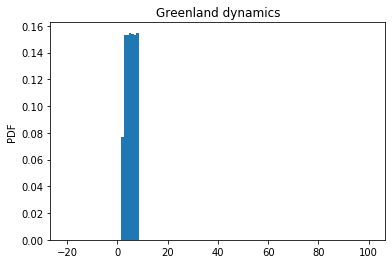

### Distribution ###


,values
percentiles,
1.0,-20.0
5.0,2.0
10.0,2.0
17.0,3.0
20.0,3.0
50.0,5.0
80.0,7.0
83.0,7.0
90.0,7.0


In [106]:
# First order term (cm/y), equal to half of observations in 2006
a1_up_gdyn        = 0.5 * a1_up_g
a1_lo_gdyn        = 0.5 * a1_lo_g
UnifDd = np.random.uniform(0, 1, N)  # Sample a new independent distribution

if GRE == 'KNMI14':
    X_gre  = misc.proj2order(TIME2, a1_up_gdyn, a1_lo_gdyn, 7.4, 1.7, UnifDd)
elif GRE == 'IPCC':
    if SCE in ['rcp26', 'rcp45']:
        Delta_gre_up_2100 = 6.3
        Delta_gre_lo_2100 = 1.4
    elif SCE == 'rcp85':
        Delta_gre_up_2100 = 8.5
        Delta_gre_lo_2100 = 2
X_gre  = misc.proj2order(TIME2, a1_up_gdyn, a1_lo_gdyn, Delta_gre_up_2100, 
                    Delta_gre_lo_2100, UnifDd)
comp_plot_dist(X_gre[:,-1], -20.5, 100.5, 'Greenland dynamics', SCE)

### Test antarctic dynamics from KNMI14 projections 

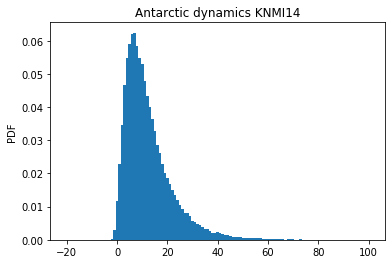

### Distribution ###


,values
percentiles,
1.0,0.0
5.0,1.0
10.0,3.0
17.0,4.0
20.0,4.0
50.0,10.0
80.0,18.0
83.0,19.0
90.0,24.0


In [18]:
X_ant_KNMI14 = ant.ant_dyn_knmi14(SCE, a1_up_a, a1_lo_a, ys, ye, TIME2, N)
comp_plot_dist(X_ant_KNMI14[:,-1], -20.5, 100.5, 'Antarctic dynamics KNMI14', 
               SCE)


### Tables of global results

In [47]:
AR5_df = pd.read_csv('../ref_results/SLR_AR5_2100', sep=';', comment='#') # , header=1
AR5_df = AR5_df.set_index('Processes')
AR5_df


,A1B med,A1B 5th,A1B 95th,RCP2.6 med,RCP2.6 5th,RCP2.6 95th,RCP4.5 med,RCP4.5 5th,RCP4.5 95th,RCP6.0 med,RCP6.0 5th,RCP6.0 95th,RCP8.5 med,RCP8.5 5th,RCP8.5 95th
Processes,,,,,,,,,,,,,,,
Thermal expansion,0.24,0.18,0.30,0.15,0.11,0.20,0.20,0.15,0.25,0.22,0.17,0.27,0.32,0.25,0.39
Glaciers,0.16,0.09,0.23,0.11,0.05,0.17,0.13,0.07,0.20,0.14,0.07,0.20,0.18,0.10,0.26
Greenland Ice Sheet SMB,0.07,0.03,0.15,0.03,0.01,0.08,0.05,0.02,0.11,0.05,0.02,0.12,0.10,0.04,0.22
Antarctic Ice Sheet SMB,–0.04,–0.07,–0.01,–0.02,–0.05,–0.00,–0.03,–0.06,–0.01,–0.03,–0.06,–0.01,–0.05,–0.09,–0.02
Greenland Ice Sheet Rapid Dynamics,0.04,0.01,0.06,0.04,0.01,0.06,0.04,0.01,0.06,0.04,0.01,0.06,0.05,0.02,0.09
Antarctic Ice Sheet Rapid Dynamics,0.08,–0.02,0.19,0.08,–0.02,0.19,0.08,–0.02,0.19,0.08,–0.02,0.19,0.08,–0.02,0.19
Land Water Storage,0.05,–0.01,0.11,0.05,–0.01,0.11,0.05,–0.01,0.11,0.05,–0.01,0.11,0.05,–0.01,0.11
Sea Level Rise,0.60,0.42,0.80,0.44,0.28,0.61,0.53,0.36,0.71,0.55,0.38,0.73,0.74,0.52,0.98
Greenland Ice Sheet,0.11,0.07,0.19,0.08,0.04,0.12,0.09,0.05,0.16,0.09,0.06,0.16,0.15,0.09,0.28


### Test Bamber et al. 2019 functions

In [52]:
importlib.reload(b19)

<module 'func_B19' from '../code/func_B19.py'>

In [19]:
path = '../../BamberDataDistribution/parameters_mean_std_opt.csv'
PAR_ar = b19.ReadB19(path)
PAR_ar

array([[[[ 0.9585524 ,  0.77373971],
         [ 0.79219789,  1.265177  ]],

        [[ 2.        ,  5.        ],
         [ 3.        ,  0.        ]],

        [[ 5.02844808, 17.99010175],
         [ 7.14703945, 26.44528395]]],


       [[[ 1.19811757,  0.64641699],
         [ 0.9684769 ,  0.66677909]],

        [[ 0.        ,  1.        ],
         [ 0.        ,  1.        ]],

        [[ 4.40567565, 18.87865761],
         [ 5.9365423 , 40.12039764]]],


       [[[ 2.16853964,  0.15616428],
         [ 1.48937135,  0.23388903]],

        [[-3.        ,  1.        ],
         [-4.        ,  1.        ]],

        [[ 1.38448557, 12.90129197],
         [ 2.86618874, 26.96745124]]]])

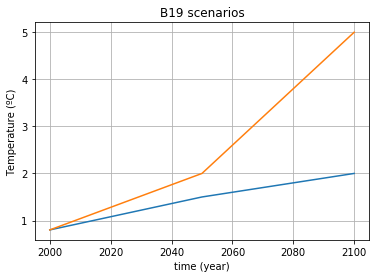

In [21]:
# Bamber et al. 2019 temperature pathways
t0 = 2000
t1 = 2050
t2 = 2100

# First order interpolation along temperature integral
# Define the temperature functions for the low and high scenarios
T0 = 0.8     # Should be floats, integers lead to problem in the computations
Tl50 = 1.5
Tl100 = 2.
Th50 = 2.
Th100 = 5.

Tl = b19.TempF(T0, Tl50, Tl100, t0, t1, t2)
Th = b19.TempF(T0, Th50, Th100, t0, t1, t2)

### Plot
t = np.arange(t0, t2+1)

fig, ax = plt.subplots()
ax.plot(t, Tl)
ax.plot(t, Th)

ax.set(xlabel='time (year)', ylabel='Temperature (ºC)',
       title='B19 scenarios')
ax.grid()

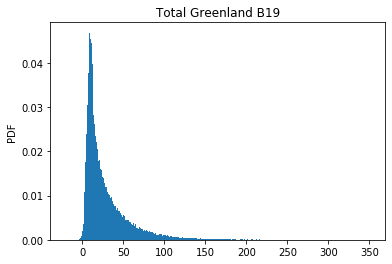

### Distribution ###


,values
percentiles,
1.0,1.0
5.0,4.0
10.0,6.0
17.0,8.0
20.0,8.0
50.0,18.0
80.0,43.0
83.0,48.0
90.0,64.0


In [22]:
# Greenland
GAM = 1.64
Tref_b   = misc.Tref(2000, 2000, TGLOB, TIME)
Td_b = misc.TempDist(TGLOBs, Tref_b, GAM, NormD)

UnifP_GIS = np.random.uniform(0, 1, N)

X_gsmb = b19.Bamber19('GIS', UnifP_GIS, [a1_lo_g, a1_up_g], ys, Td_b)
X_gsmb = X_gsmb + 0.3    # Contribution between 1995 and 2005 in mm

comp_plot_dist(X_gsmb[:,-1], -20.5, 350.5, 'Total Greenland B19', 
               SCE)
# !!! The above computation is sensitive to the right end of the 
#histogram computation

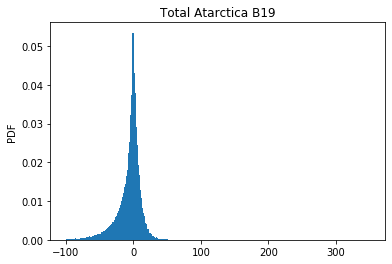

### Distribution ###


,values
percentiles,
1.0,-69.0
5.0,-41.0
10.0,-28.0
17.0,-18.0
20.0,-16.0
50.0,-2.0
80.0,5.0
83.0,6.0
90.0,10.0


In [26]:
# Antarctica
UnifP_WAIS = np.random.uniform(0, 1, N)
UnifP_EAIS = np.random.uniform(0, 1, N)

X_ant_wais = b19.Bamber19("WAIS", UnifP_WAIS, [a1_lo_a, a1_up_a], ys, Td_b)
X_ant_eais = b19.Bamber19("EAIS", UnifP_EAIS, [0, 0], ys, Td_b)
X_ant = X_ant_wais + X_ant_eais    # Contribution between 1995 and 2005 in mm

comp_plot_dist(X_ant[:,50], -100.5, 350.5, 'Total Atarctica B19', 
               SCE)

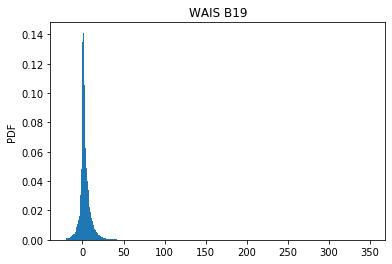

### Distribution ###


,values
percentiles,
1.0,-14.0
5.0,-7.0
10.0,-3.0
17.0,-1.0
20.0,-1.0
50.0,1.0
80.0,6.0
83.0,7.0
90.0,10.0


In [27]:
comp_plot_dist(X_ant_wais[:,50], -20.5, 350.5, 'WAIS B19', 
               SCE)

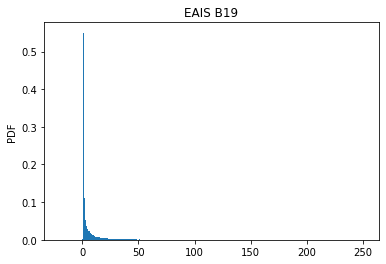

### Distribution ###


,values
percentiles,
1.0,0.0
5.0,0.0
10.0,0.0
17.0,0.0
20.0,0.0
50.0,1.0
80.0,6.0
83.0,7.0
90.0,14.0


In [62]:
comp_plot_dist(X_ant_eais[:,-1], -20.5, 250.5, 'EAIS B19', 
               SCE)